# **Random Sampling Imputation in Categorical Data**

### **Import libraries, Load and Analyze Dataset**

In [46]:
import numpy as np
import pandas as pd

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Learning Machine Learning/hppd_train.csv', usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [50]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


### **Get percentage of Missing Values**

In [51]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


### **Create X & Y for Train-Test-Split**

In [52]:
x = df
y = df['SalePrice']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

### **Duplicate Coloumns**

In [54]:
x_train['FireplaceQu_Imputed'] = x_train['FireplaceQu']
x_train['GarageQual_Imputed'] = x_train['GarageQual']
x_test['FireplaceQu_Imputed'] = x_test['FireplaceQu']
x_test['GarageQual_Imputed'] = x_test['GarageQual']

### **Impute Random Value in FireplaceQu_Imputed and GarageQual_Imputed coloumn for null values**

In [55]:
x_train['GarageQual_Imputed'][x_train['GarageQual_Imputed'].isnull()] =   x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_Imputed'][x_test['GarageQual_Imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
x_train['FireplaceQu_Imputed'][x_train['FireplaceQu_Imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_Imputed'][x_test['FireplaceQu_Imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

<ipython-input-55-0bf44ac4f5ae>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_Imputed'][x_train['GarageQual_Imputed'].isnull()] =   x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
<ip

### **Review Frequency in Original & Imputed**

In [56]:
temp = pd.concat([x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()), x_train['GarageQual_Imputed'].value_counts() /len(x_train)],axis=1)
temp.columns = ['Original', 'Imputed']
temp

,Original,Imputed
TA,0.951043,0.949486
Fa,0.037171,0.038527
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [57]:
temp = pd.concat([x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()), x_train['FireplaceQu_Imputed'].value_counts() /len(x_train)],axis=1)
temp.columns = ['Original', 'Imputed']
temp

,Original,Imputed
Gd,0.494272,0.497432
TA,0.412439,0.411815
Fa,0.040917,0.040240
Po,0.027823,0.026541
Ex,0.024550,0.023973


### **Compare category Fireplace before Imputation**

<ipython-input-58-e3096f1150ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-58-e3096f1150ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] =

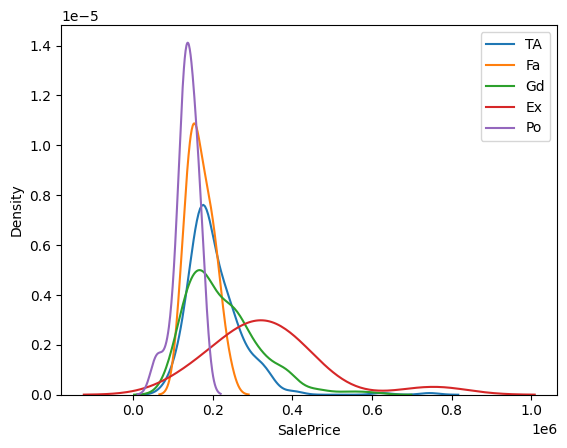

In [58]:
for category in \
x_train['FireplaceQu'].dropna().unique():
 sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

### **Compare category Fireplace after Imputation**

<ipython-input-59-c55a104fbd66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_Imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-59-c55a104fbd66>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firepla

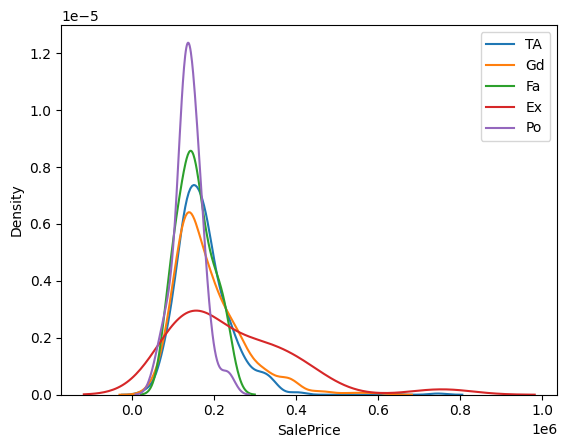

In [59]:
for category in \
x_train['FireplaceQu_Imputed'].dropna().unique():

    sns.distplot(x_train[x_train['FireplaceQu_Imputed'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()